# Arrival Delay Data From Charlotte Douglas International Airport 2018

In [1]:
import csv 

with open('aviation_data_science_2018.csv') as csvfile:
    avv_data = list(csv.DictReader(csvfile))

## Iterating through data to create dictionary:

In [2]:
temp_list1 = []
temp_list2 = []
for n in range(0, len(avv_data), 20):
    temp_dict = avv_data[n]
    temp_list1.append(n)
    try:
        temp_string = temp_dict["arrival_stand_scheduled_time"]
        temp_string = temp_string[11:len(temp_string)]
        temp_float = str(float(temp_string.replace(":","")))
        temp_float = float(temp_float[0:2]) + (float(temp_float[2:4])/60) + (float(temp_float[4:6])/3600)
        
        temp_string2 = temp_dict["arrival_stand_actual_time"]
        temp_string2 = temp_string2[11:len(temp_string2)]
        temp_float2 = str(float(temp_string2.replace(":","")))
        temp_float2 = float(temp_float2[0:2]) + float(temp_float2[2:4])/60 + float(temp_float2[4:6])/3600
        
        temp_float3 = temp_float2 - temp_float
        #temp_float3 = "{:.4f}".format(round(temp_float, 4))
        temp_list2.append(temp_float3)
    except ValueError:
        temp_list1.remove(n)

## Putting dictionary in pandas datatable: 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dict_data = {"flight": temp_list1,
            "difference": temp_list2}

usable_data = pd.DataFrame(data=dict_data)
usable_data

,flight,difference
0,0,0.083333
1,20,-1.166667
2,40,0.500000
3,60,-10.433333
4,100,-0.050000
...,...,...
24380,561620,2.833333
24381,561640,-0.266667
24382,561660,0.000000
24383,561680,-0.166667


## Plotting data using matplotlibs:

In [5]:
x = usable_data.flight
y = usable_data.difference

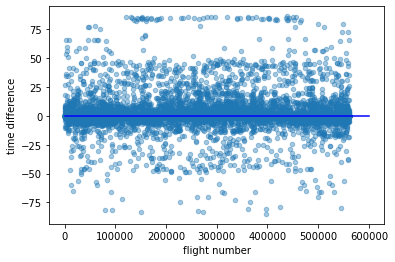

In [6]:
plt.scatter(x,y, marker="o", alpha=0.4, s=20)
plt.xlabel("flight number")
plt.ylabel("time difference")
plt.plot([-100, 600000], [0, 0], 'b')

## Machine learning regression:

In [7]:
model = np.polyfit(x, y, 3)
model

array([-7.47288472e-18,  1.22588495e-12,  1.60262014e-06,  4.65338436e-01])

In [8]:
predict = np.poly1d(model)

## Regression estimation for given x value:

In [9]:
flight_number = 700000
predict(flight_number)

-0.37534329633273655

#### predicted delay to be -0.375... minutes less than scheduled time for the 700,000th flight in this example ^

## Linear regression viability r2 score (how close data is to regression):

In [10]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.00019469455556597737

## Plotting regression and data:

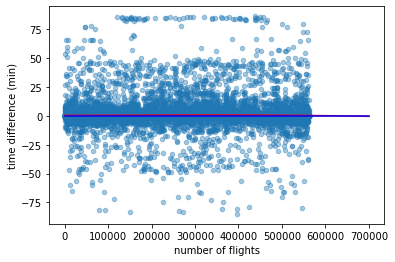

In [11]:
x_lin_reg = range(0, 700000)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y, marker="o", alpha=0.4, s=20)
plt.xlabel("number of flights")
plt.ylabel("time difference (min)")
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.plot([0, 700000], [0, 0], 'b')

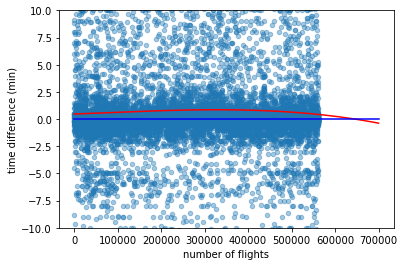

In [12]:
x_lin_reg = range(0, 700000)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y, marker="o", alpha=0.4, s=20)
plt.xlabel("number of flights")
plt.ylabel("time difference (min)")
plt.ylim(-10, 10)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.plot([0, 700000], [0, 0], 'b')